<a href="https://colab.research.google.com/github/aasthagoyal46/ImageClassification/blob/master/PyTorchCIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


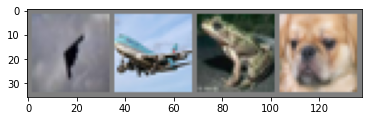


plane   plane    frog     dog


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print('   '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [0]:
import torch.optim as optim

def train(net, epoch, lr, momentum):
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(net.parameters(), lr=lr, momentum=momentum)
  
  accuracy = []
  
  for epoch in range(epoch):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
      # get the inputs; data is a list of [inputs, labels]
      inputs, labels = data

      # zero the parameter gradients
      optimizer.zero_grad()

      # forward + backward + optimize
      outputs = net(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

      # print statistics
      running_loss += loss.item()
      if i % 2000 == 1999:    # print every 2000 mini-batches
          print('[%d, %5d] loss: %.3f' %
                (epoch + 1, i + 1, running_loss / 2000))
          running_loss = 0.0

    print("For epoch : "+str(epoch)) 
    accuracy.append(checkAccuracy(net)) 

  print('Finished Training')
  return accuracy

In [0]:
def checkAccuracy(net):
  correct = 0
  total = 0
  class_correct = list(0. for i in range(10))
  class_total = list(0. for i in range(10))

  with torch.no_grad():
      for data in testloader:
          images, labels = data
          outputs = net(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

          c = (predicted == labels).squeeze()
          for i in range(4):
              label = labels[i]
              class_correct[label] += c[i].item()
              class_total[label] += 1

  print('Accuracy of the network on the 10000 test images: %d %% \n' % (
      100 * correct / total))

  # for i in range(10):
  #     print('Accuracy of %5s : %2d %%' % (
  #         classes[i], 100 * class_correct[i] / class_total[i]))
  
  return correct / total

In [8]:
net1 = Net()
accuracy1 = train(net1, 10, 0.001, 0.9)

[1,  2000] loss: 2.160
[1,  4000] loss: 1.787
[1,  6000] loss: 1.624
[1,  8000] loss: 1.548
[1, 10000] loss: 1.496
[1, 12000] loss: 1.443
For epoch : 0
Accuracy of the network on the 10000 test images: 50 % 

[2,  2000] loss: 1.351
[2,  4000] loss: 1.368
[2,  6000] loss: 1.343
[2,  8000] loss: 1.311
[2, 10000] loss: 1.273
[2, 12000] loss: 1.257
For epoch : 1
Accuracy of the network on the 10000 test images: 55 % 

[3,  2000] loss: 1.204
[3,  4000] loss: 1.185
[3,  6000] loss: 1.177
[3,  8000] loss: 1.181
[3, 10000] loss: 1.170
[3, 12000] loss: 1.141
For epoch : 2
Accuracy of the network on the 10000 test images: 55 % 

[4,  2000] loss: 1.072
[4,  4000] loss: 1.078
[4,  6000] loss: 1.066
[4,  8000] loss: 1.094
[4, 10000] loss: 1.092
[4, 12000] loss: 1.098
For epoch : 3
Accuracy of the network on the 10000 test images: 60 % 

[5,  2000] loss: 1.024
[5,  4000] loss: 1.010
[5,  6000] loss: 1.003
[5,  8000] loss: 1.022
[5, 10000] loss: 1.017
[5, 12000] loss: 1.010
For epoch : 4
Accuracy of 

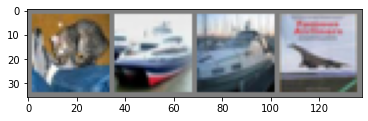

GroundTruth:    cat  ship  ship plane


In [8]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
outputs = net1(images)

In [10]:
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship  ship


In [9]:
net2 = Net()
accuracy2 = train(net2, 10, 0.005, 0.9)

[1,  2000] loss: 1.993
[1,  4000] loss: 1.764
[1,  6000] loss: 1.694
[1,  8000] loss: 1.646
[1, 10000] loss: 1.615
[1, 12000] loss: 1.615
For epoch : 0
Accuracy of the network on the 10000 test images: 42 % 

[2,  2000] loss: 1.582
[2,  4000] loss: 1.615
[2,  6000] loss: 1.600
[2,  8000] loss: 1.622
[2, 10000] loss: 1.616
[2, 12000] loss: 1.582
For epoch : 1
Accuracy of the network on the 10000 test images: 45 % 

[3,  2000] loss: 1.568
[3,  4000] loss: 1.567
[3,  6000] loss: 1.599
[3,  8000] loss: 1.605
[3, 10000] loss: 1.587
[3, 12000] loss: 1.604
For epoch : 2
Accuracy of the network on the 10000 test images: 42 % 

[4,  2000] loss: 1.578
[4,  4000] loss: 1.615
[4,  6000] loss: 1.626
[4,  8000] loss: 1.614
[4, 10000] loss: 1.625
[4, 12000] loss: 1.632
For epoch : 3
Accuracy of the network on the 10000 test images: 43 % 

[5,  2000] loss: 1.594
[5,  4000] loss: 1.647
[5,  6000] loss: 1.610
[5,  8000] loss: 1.602
[5, 10000] loss: 1.599
[5, 12000] loss: 1.673
For epoch : 4
Accuracy of 

In [13]:
net3 = Net()
accuracy3 = train(net3, 10, 0.001, 0.7)

[1,  2000] loss: 2.290
[1,  4000] loss: 2.082
[1,  6000] loss: 1.914
[1,  8000] loss: 1.815
[1, 10000] loss: 1.712
[1, 12000] loss: 1.660
For epoch : 0
Accuracy of the network on the 10000 test images: 41 % 

[2,  2000] loss: 1.592
[2,  4000] loss: 1.549
[2,  6000] loss: 1.506
[2,  8000] loss: 1.464
[2, 10000] loss: 1.457
[2, 12000] loss: 1.415
For epoch : 1
Accuracy of the network on the 10000 test images: 50 % 

[3,  2000] loss: 1.356
[3,  4000] loss: 1.328
[3,  6000] loss: 1.312
[3,  8000] loss: 1.309
[3, 10000] loss: 1.308
[3, 12000] loss: 1.281
For epoch : 2
Accuracy of the network on the 10000 test images: 55 % 

[4,  2000] loss: 1.219
[4,  4000] loss: 1.219
[4,  6000] loss: 1.223
[4,  8000] loss: 1.194
[4, 10000] loss: 1.181
[4, 12000] loss: 1.194
For epoch : 3
Accuracy of the network on the 10000 test images: 57 % 

[5,  2000] loss: 1.137
[5,  4000] loss: 1.148
[5,  6000] loss: 1.121
[5,  8000] loss: 1.120
[5, 10000] loss: 1.110
[5, 12000] loss: 1.113
For epoch : 4
Accuracy of 

In [0]:
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 10, 5)
        self.conv3 = nn.Conv2d(10, 16, 3)
        self.fc1 = nn.Linear(16 * 3 * 3, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        #14X14X6
        x = self.pool(F.relu(self.conv2(x)))
        #5X5X10
        x = F.relu(self.conv3(x))
        #3X3#16
        x = x.view(-1, 16 * 3 * 3)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [14]:
net4 = Net2()
accuracy4 = train(net4, 10, 0.001, 0.9)

[1,  2000] loss: 2.300
[1,  4000] loss: 2.100
[1,  6000] loss: 1.903
[1,  8000] loss: 1.767
[1, 10000] loss: 1.672
[1, 12000] loss: 1.610
For epoch : 0
Accuracy of the network on the 10000 test images: 44 % 

[2,  2000] loss: 1.550
[2,  4000] loss: 1.518
[2,  6000] loss: 1.471
[2,  8000] loss: 1.447
[2, 10000] loss: 1.423
[2, 12000] loss: 1.439
For epoch : 1
Accuracy of the network on the 10000 test images: 47 % 

[3,  2000] loss: 1.368
[3,  4000] loss: 1.383
[3,  6000] loss: 1.377
[3,  8000] loss: 1.341
[3, 10000] loss: 1.336
[3, 12000] loss: 1.316
For epoch : 2
Accuracy of the network on the 10000 test images: 52 % 

[4,  2000] loss: 1.293
[4,  4000] loss: 1.283
[4,  6000] loss: 1.268
[4,  8000] loss: 1.277
[4, 10000] loss: 1.277
[4, 12000] loss: 1.276
For epoch : 3
Accuracy of the network on the 10000 test images: 55 % 

[5,  2000] loss: 1.227
[5,  4000] loss: 1.255
[5,  6000] loss: 1.241
[5,  8000] loss: 1.242
[5, 10000] loss: 1.213
[5, 12000] loss: 1.233
For epoch : 4
Accuracy of 

In [0]:
class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [18]:
net5 = Net3()
accuracy4 = train(net5, 10, 0.001, 0.9)

[1,  2000] loss: 2.017
[1,  4000] loss: 1.713
[1,  6000] loss: 1.578
[1,  8000] loss: 1.503
[1, 10000] loss: 1.471
[1, 12000] loss: 1.416
For epoch : 0
Accuracy of the network on the 10000 test images: 51 % 

[2,  2000] loss: 1.316
[2,  4000] loss: 1.309
[2,  6000] loss: 1.285
[2,  8000] loss: 1.283
[2, 10000] loss: 1.250
[2, 12000] loss: 1.231
For epoch : 1
Accuracy of the network on the 10000 test images: 56 % 

[3,  2000] loss: 1.175
[3,  4000] loss: 1.183
[3,  6000] loss: 1.148
[3,  8000] loss: 1.159
[3, 10000] loss: 1.120
[3, 12000] loss: 1.141
For epoch : 2
Accuracy of the network on the 10000 test images: 58 % 

[4,  2000] loss: 1.075
[4,  4000] loss: 1.088
[4,  6000] loss: 1.081
[4,  8000] loss: 1.077
[4, 10000] loss: 1.051
[4, 12000] loss: 1.086
For epoch : 3
Accuracy of the network on the 10000 test images: 58 % 

[5,  2000] loss: 0.999
[5,  4000] loss: 1.011
[5,  6000] loss: 1.033
[5,  8000] loss: 1.040
[5, 10000] loss: 1.007
[5, 12000] loss: 1.017
For epoch : 4
Accuracy of 